In [5]:
from dynamic_fusion.data_generator.configuration import EventDiscretizerConfiguration
from dynamic_fusion.data_generator.event_discretizer import EventDiscretizer
import pandas as pd
import numpy as np

In [28]:
config = EventDiscretizerConfiguration()
config.number_of_temporal_bins = 5
config.number_of_temporal_sub_bins_per_bin = 2
config.ground_truth_temporal_location_in_bin = "end"

In [29]:
discretizer = EventDiscretizer(config, number_of_images_to_generate_per_input=11, fps=20, target_image_size=[1,1])

In [70]:
np.random.seed(0)
times = np.random.random(10)/2
times.sort()

polarities = np.random.random(10) > 0.5

x = [0]*10
y = [0]*10

events = pd.DataFrame({"timestamp": times, "x": x, "y": y, "polarity": polarities})
discretized_events = discretizer._discretize_events(events, 1)

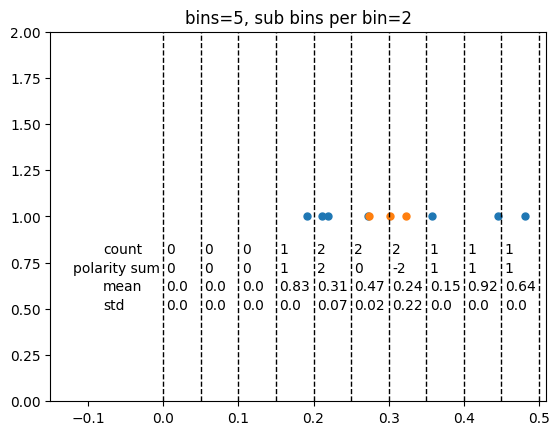

   timestamp  x  y  polarity
0   0.191721  0  0      True
1   0.211827  0  0      True
2   0.218794  0  0      True
3   0.272442  0  0      True
4   0.274407  0  0     False
5   0.301382  0  0     False
6   0.322947  0  0     False
7   0.357595  0  0      True
8   0.445887  0  0      True
9   0.481831  0  0      True


In [100]:
from matplotlib import pyplot as plt

positive_events = events["timestamp"][events["polarity"] > 0]
negative_events = events["timestamp"][events["polarity"] == 0]

plt.title(f"bins={config.number_of_temporal_bins}, sub bins per bin={config.number_of_temporal_sub_bins_per_bin}")

plt.plot(positive_events, [1]*len(positive_events), '.', markersize=10)
plt.plot(negative_events, [1]*len(negative_events), '.', markersize=10)

sub_bin_size = (discretizer.number_of_images_to_generate_per_input-1)/discretizer.fps/config.number_of_temporal_bins/config.number_of_temporal_sub_bins_per_bin
sub_bin_edges = np.arange(0, sub_bin_size*config.number_of_temporal_bins*config.number_of_temporal_sub_bins_per_bin+sub_bin_size/2, sub_bin_size)

plt.vlines(sub_bin_edges, 0, 2, 'black', '--', linewidth=1)
plt.ylim(0,2)
plt.xlim(-0.15, max(sub_bin_edges)+0.01)
for event_count, polarity_sum, mean, std, sub_bin_edge in zip(discretized_events.event_count[:,:,0,0].flatten(),discretized_events.event_polarity_sum[:,:,0,0].flatten(),
                                                              discretized_events.timestamp_mean[:,:,0,0].flatten(), discretized_events.timestamp_std[:,:,0,0].flatten(),
                                                              sub_bin_edges[1:]):
    plt.text(sub_bin_edge-sub_bin_size/1.1, 0.8, int(event_count))
    plt.text(sub_bin_edge-sub_bin_size/1.1, 0.7, int(polarity_sum))
    plt.text(sub_bin_edge-sub_bin_size/1.1, 0.6, f"{float(mean):.2}")
    plt.text(sub_bin_edge-sub_bin_size/1.1, 0.5, f"{float(std):.2}")

plt.text(-0.08, 0.8, "count")
plt.text(-0.12, 0.7, "polarity sum")
plt.text(-0.08, 0.6, "mean")
plt.text(-0.08, 0.5, "std")

plt.show()
print(events)